In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import load_iris
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris= load_iris()
data= pd.DataFrame(iris['data'], columns= iris['feature_names'])
labels= pd.DataFrame(iris['target'])

In [3]:
data= pd.concat([data, labels], axis= 1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### DBSCAN 

In [4]:
model= DBSCAN(eps= 0.5, min_samples= 5)
predict= pd.DataFrame(model.fit_predict(data))
predict.columns= ['predict']
predict

,predict
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
r= pd.concat([data, predict], axis= 1)
r

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


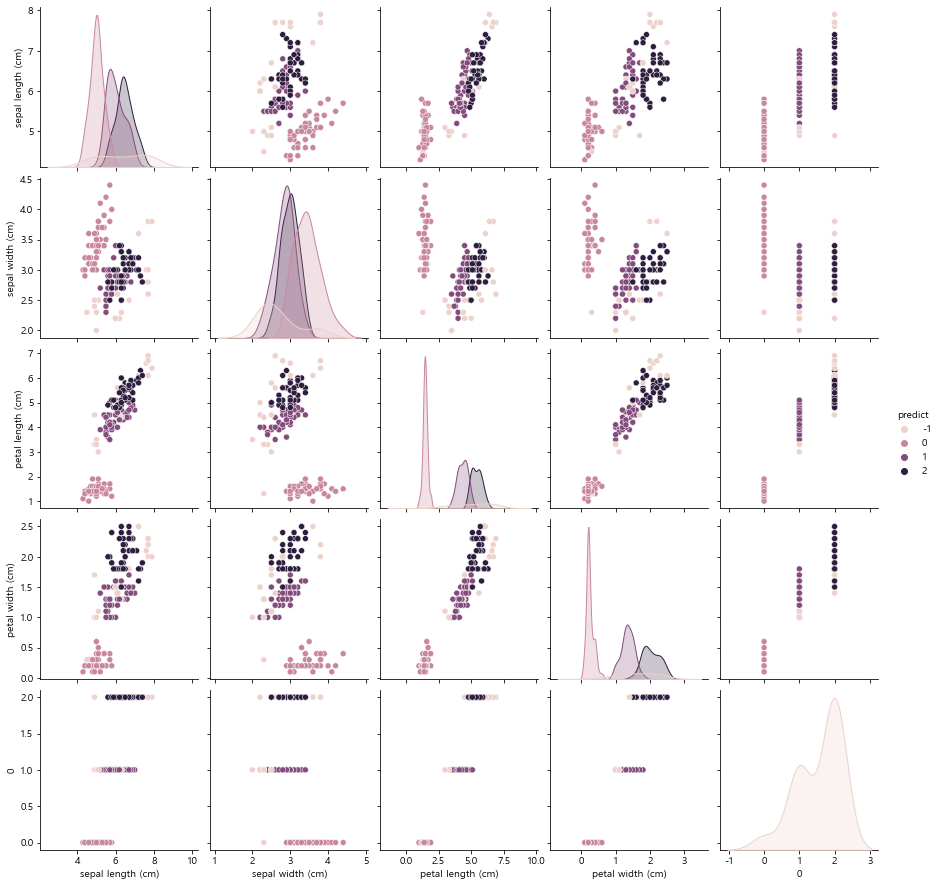

In [6]:
sns.pairplot(r, hue= 'predict')
plt.show()

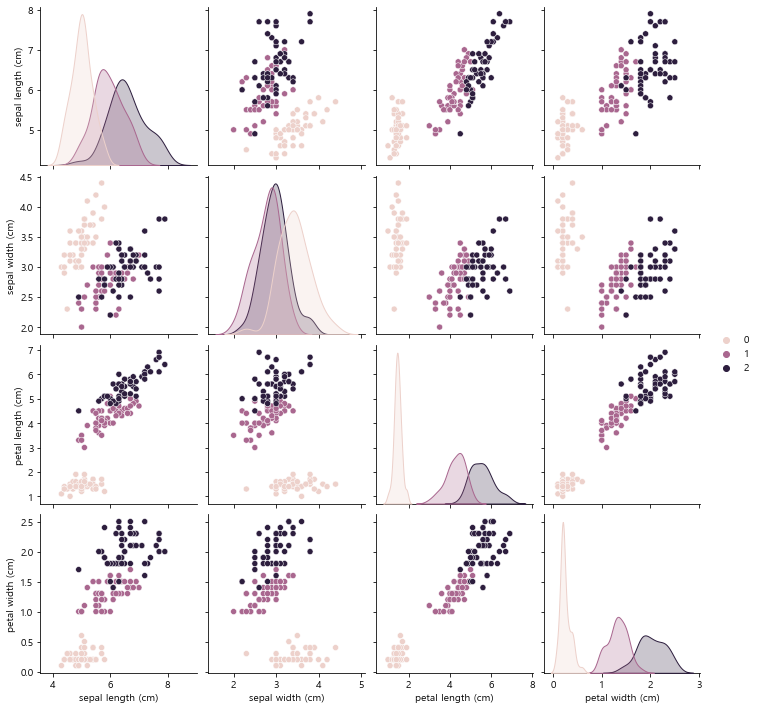

In [7]:
sns.pairplot(data, hue= 0)
plt.show()

In [8]:
km= KMeans(n_clusters= 3, random_state= 0)
km.fit(data)

KMeans(n_clusters=3, random_state=0)

In [9]:
pred= pd.DataFrame(km.labels_)
pred.columns= ['predict']

In [10]:
r2= pd.concat([data, pred], axis= 1)
r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   0                  150 non-null    int32  
 5   predict            150 non-null    int32  
dtypes: float64(4), int32(2)
memory usage: 6.0 KB


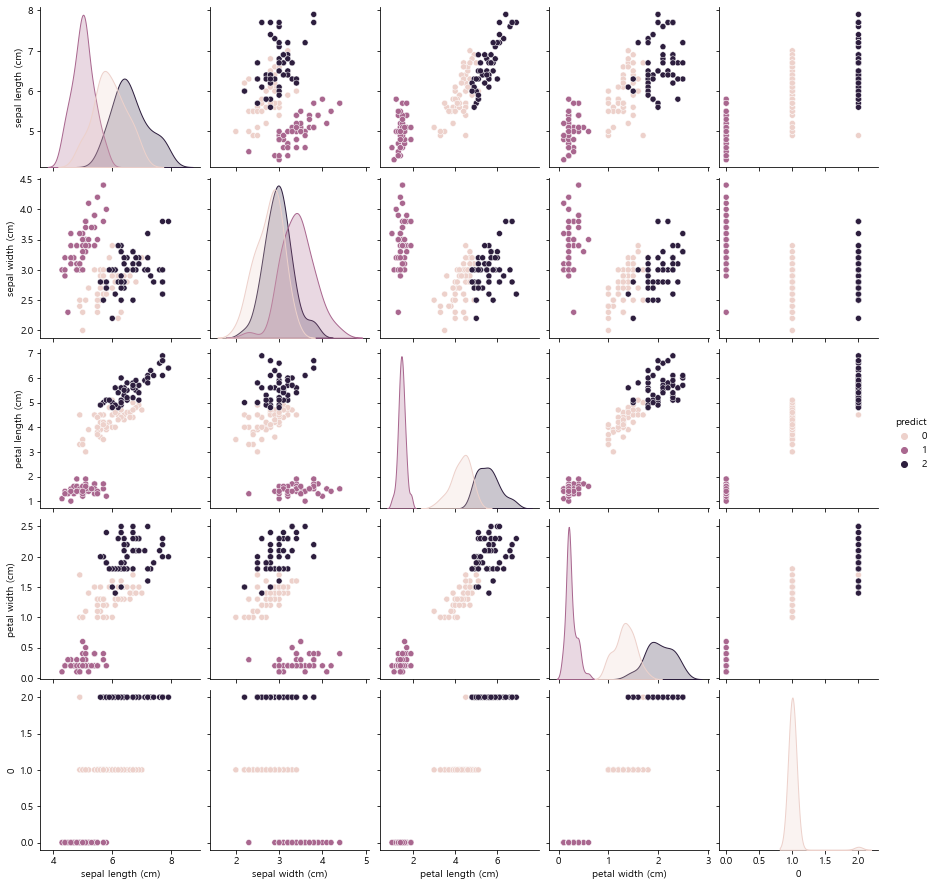

In [11]:
sns.pairplot(r2, hue= 'predict')
plt.show()

- iris 데이터 에선 DBSCAN보다 K-Means가 더 적합하지만 모든 데이터에서 K-Means가 군집 분석을 더 잘한다는 의미는 아님
- 머신러닝에서는 무조건적으로 더 좋다고 말할 수 있는 모델은 존재하지 않는다. -> 각각의 다른 데이터들에 대해 그 데이터를 분석하고 어떤 알고리즘이 사용하기에 더 적합한지 판단해야함
- 그러므로 데이터 특성에 맞는 모델을 사용해야함